In [25]:
import pandas as pd
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(url)
df


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.570000,25.55°C,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.690000,25.55°C,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.390000,25.55°C,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.490000,25.55°C,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.170000,25.55°C,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


In [27]:
df = df.drop(columns=['NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

In [28]:
df['Temp'].value_counts()

Temp
25.55°C    2500
Name: count, dtype: int64

In [29]:
df['Temp'] = df['Temp'].str.split('°C').str[0].astype(float)
df['Temp'].value_counts()


Temp
25.55    2500
Name: count, dtype: int64

In [30]:
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   pH             2500 non-null   float64
 2   Temp           2500 non-null   float64
 3   TSS            2500 non-null   float64
 4   DO             2500 non-null   float64
 5   BOD            2500 non-null   float64
 6   COD            2500 non-null   float64
 7   Nitrat         2500 non-null   float64
 8   FecalColiform  2500 non-null   float64
 9   Fosfat         2500 non-null   float64
 10  IP             2500 non-null   float64
 11  Class          2500 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 234.5 KB


No               0
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
IP               0
Class            0
dtype: int64

# Logistic Classification

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)


#### Evaluasi

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average="weighted")}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba, multi_class='ovr')}")

Accuracy: 0.958
Precision: 0.9581014492753622
Recall: 0.958
F1 Score: 0.9578799711093655
ROC AUC Score: 0.9984646651519575


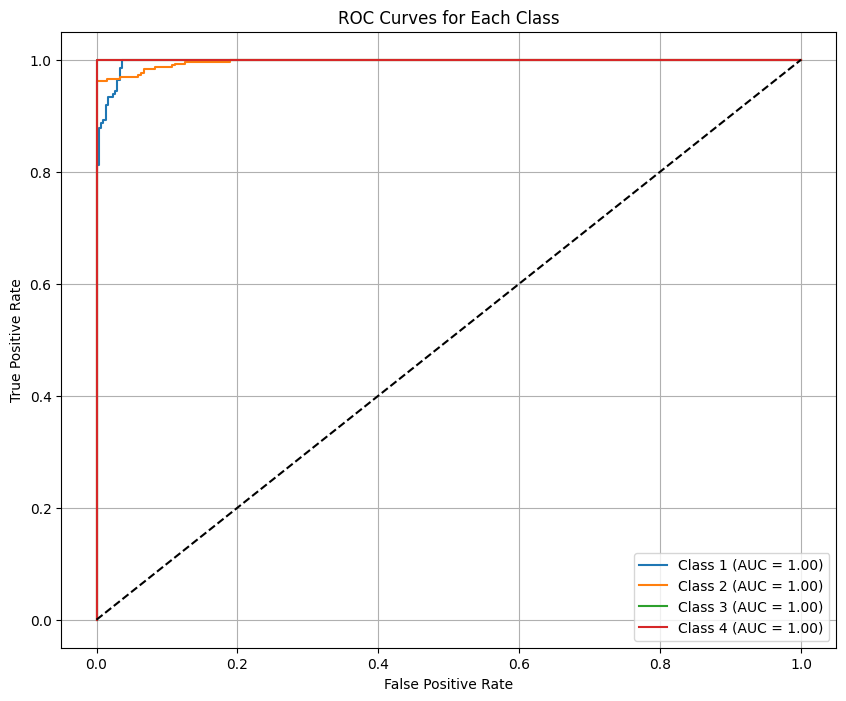

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

classes = sorted(y.unique())

for i in classes:

    y_test_bin = (y_test == i).astype(int)
    y_pred_proba_class = y_pred_proba[:, i-1]
    
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()


## Logistic Regression, Accuracy, Precision, Recall, F1, ROC, AUC

### 1. **Logistic Regression**
Logistic Regression adalah metode statistika untuk memodelkan probabilitas suatu kejadian berdasarkan variabel independen. Digunakan untuk klasifikasi biner (0 atau 1).

Persamaan Logistic Regression:
$$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$
Dimana:
- $P(Y=1)$ adalah probabilitas kelas positif.
- $X$ adalah variabel independen.
- $\beta_0, \beta_1$ adalah parameter regresi.
- $e$ adalah basis logaritma natural.

### 2. **Accuracy**
Akurasi mengukur proporsi prediksi yang benar:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

### 3. **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar:
$$
Precision = \frac{TP}{TP + FP}
$$

### 4. **Recall (Sensitivity)**
Recall mengukur seberapa banyak sampel positif yang berhasil dideteksi:
$$
Recall = \frac{TP}{TP + FN}
$$

### 5. **F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

### 6. **ROC (Receiver Operating Characteristic) Curve**
ROC adalah kurva yang menggambarkan performa model dengan memplot TPR (True Positive Rate) vs. FPR (False Positive Rate).

### 7. **AUC (Area Under Curve)**
AUC adalah luas di bawah kurva ROC yang menunjukkan seberapa baik model dalam membedakan kelas positif dan negatif.

Semakin tinggi nilai AUC (mendekati 1), semakin baik model dalam membedakan kelas.